$$ ITI \space AI-Pro: \space Intake \space 44 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 4 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC 
from sklearn import svm
from sklearn.impute import KNNImputer ,SimpleImputer
from sklearn.preprocessing import StandardScaler


----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [5]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

C:\Users\ITI\AppData\Local\Temp\ipykernel_23584\4177423669.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('Data/train.csv')


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


In [6]:
 train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [6]:
train.describe(include='float64')

,Monthly_Inhand_Salary,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,27.754251,32.285173,1403.118217
std,3183.686167,193.177339,5.116875,8306.041270
min,303.645417,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,32.305784,69.249473
75%,5957.448333,9.000000,36.496663,161.224249
max,15204.633333,2597.000000,50.000000,82331.000000


In [7]:
train.describe(include='int64')

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date
count,100000.000000,100000.00000,100000.000000,100000.000000
mean,17.091280,22.47443,72.466040,21.068780
std,117.404834,129.05741,466.422621,14.860104
min,-1.000000,0.00000,1.000000,-5.000000
25%,3.000000,4.00000,8.000000,10.000000
50%,6.000000,5.00000,13.000000,18.000000
75%,7.000000,7.00000,20.000000,28.000000
max,1798.000000,1499.00000,5797.000000,67.000000


In [8]:
train.describe(include='object')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


In [9]:
train.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [10]:
train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

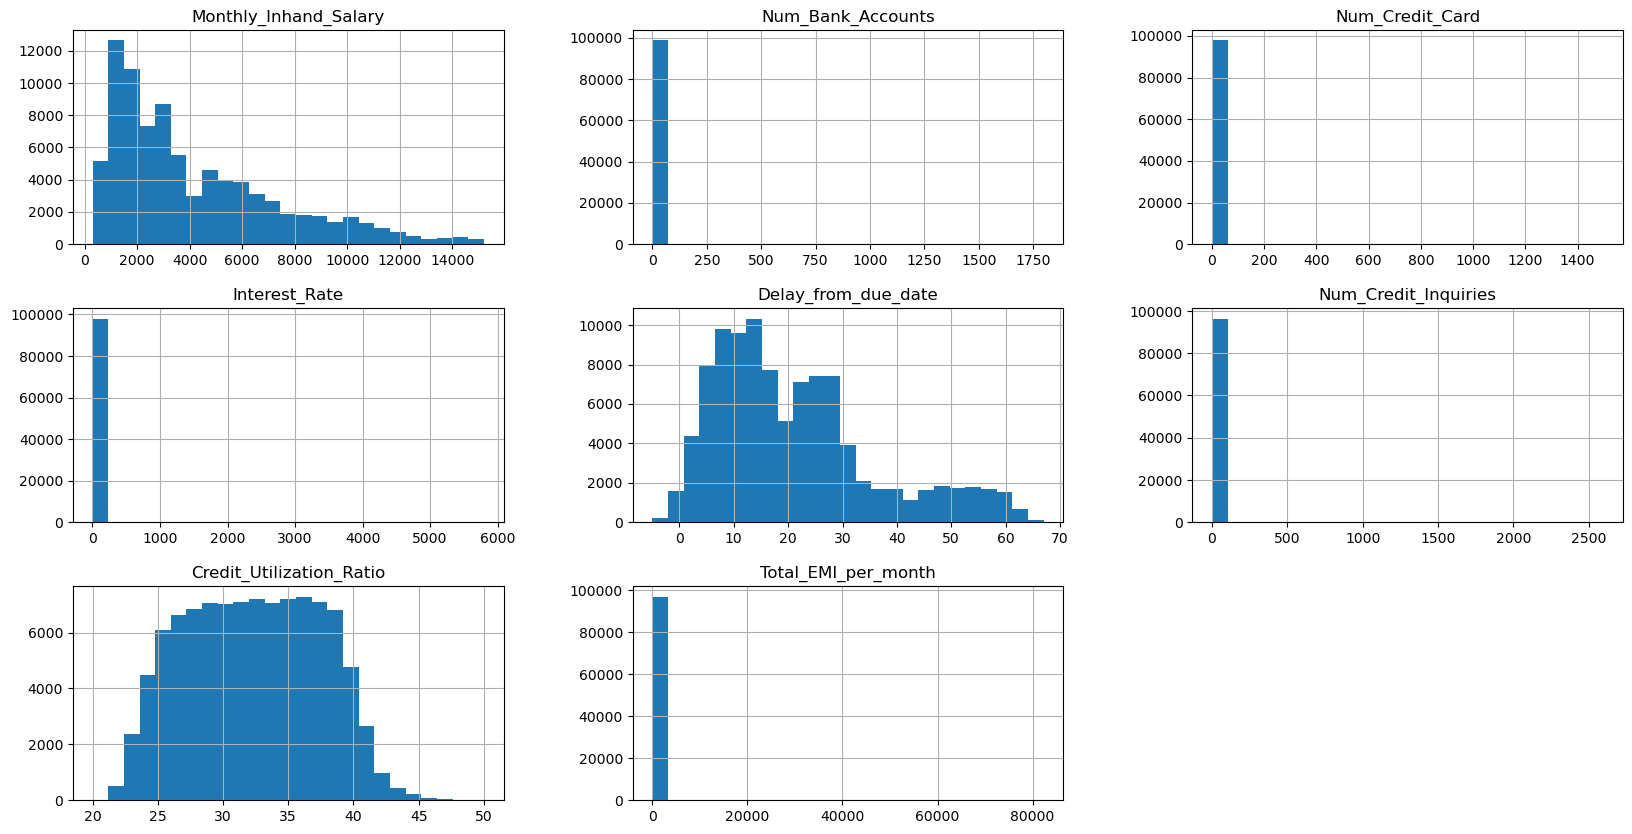

In [11]:
train.hist(bins=25,figsize=(20,10));

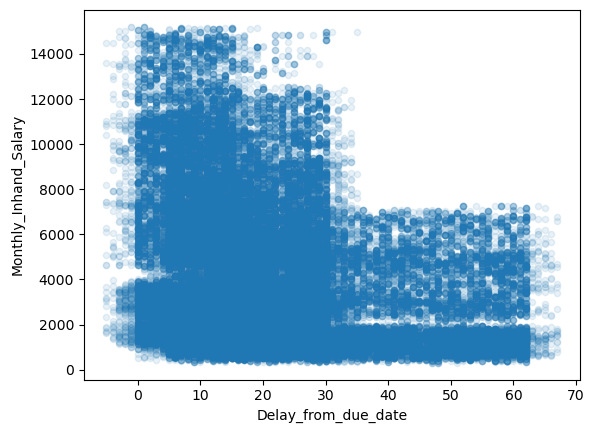

In [12]:
train.plot(kind="scatter",x="Delay_from_due_date",y="Monthly_Inhand_Salary",alpha=0.1);

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

Hints:
- It could be helpful to check `sklearn.preprocessing` module.
- Remember that Support Vector Machine classifiers require special preprocessing.

frist i will remove strange values from data and replace them with nan

In [7]:
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')

In [8]:
train=train.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)


# dropping unecessary columns

In [9]:
train.drop(["ID","Customer_ID","Name","SSN","Month","Type_of_Loan"],axis=1,inplace=True)

# correcting data taypes 

In [10]:
train['Age']                     = train.Age.astype(int) 
train['Num_of_Loan']             = train.Num_of_Loan.astype(int) 
train['Num_of_Delayed_Payment']  = train.Num_of_Delayed_Payment.astype(float)
train['Changed_Credit_Limit']    = train.Changed_Credit_Limit.astype(float)
train['Outstanding_Debt']        = train.Outstanding_Debt.astype(float)
train['Amount_invested_monthly'] = train.Amount_invested_monthly.astype(float)
train['Monthly_Balance']         = train.Monthly_Balance.astype(float)

# numerical columns

In [11]:
train["Monthly_Inhand_Salary"].isna().sum()

15002

In [12]:
train['Annual_Income']= train.Annual_Income.astype(float)

In [13]:
train["Monthly_Inhand_Salary"]=train["Monthly_Inhand_Salary"].fillna(train['Annual_Income']/12)

In [14]:
train["Monthly_Inhand_Salary"].isna().sum()

0

In [15]:
train["Num_Credit_Inquiries"].isna().sum()

1965

In [16]:
simple_mputer= SimpleImputer(strategy="mean")

In [17]:
train["Num_Credit_Inquiries"] = simple_mputer.fit_transform(train["Num_Credit_Inquiries"].values.reshape(-1, 1))

In [18]:
train["Num_Credit_Inquiries"].isna().sum()

0

In [19]:
train["Num_of_Delayed_Payment"].isna().sum()

7002

In [20]:
train["Num_of_Delayed_Payment"] = simple_mputer.fit_transform(train["Num_of_Delayed_Payment"].values.reshape(-1, 1))

In [21]:
train["Num_of_Delayed_Payment"].isna().sum()

0

In [22]:
years  = []
months = []
for value in train["Credit_History_Age"]:
    if value is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = value.lower().split()
        years_ = int(new_str[0])
        months_ = int(new_str[new_str.index('and')+1])
        years.append(years_)
        months.append(months_)
train['Credit_Age_years'] = pd.Series(years)
train['Credit_Age_months'] = pd.Series(months) 
train.drop('Credit_History_Age',axis=1,inplace=True)

In [23]:
train['Credit_Age_years'].isna().sum()

9030

In [24]:
train["Credit_Age_years"] = simple_mputer.fit_transform(train["Credit_Age_years"].values.reshape(-1, 1))

In [25]:
train["Credit_Age_months"] = simple_mputer.fit_transform(train["Credit_Age_months"].values.reshape(-1, 1))

In [26]:
train['Credit_Age_years'].isna().sum()

0

In [27]:
train['Amount_invested_monthly']=simple_mputer.fit_transform(train['Amount_invested_monthly'].values.reshape(-1,1))

In [28]:
train['Amount_invested_monthly'].isna().sum()

0

In [29]:
train['Monthly_Balance']=simple_mputer.fit_transform(train['Monthly_Balance'].values.reshape(-1,1))

In [30]:
train['Monthly_Balance'].isna().sum()

0

# A function to impute all numerical columns in one step

In [31]:
numerical_data = []
object_data = []

for column in train.columns:
    if train.dtypes[column] != 'object':
        numerical_data.append(column)
    else:
        object_data.append(column)

In [32]:
numerical_data

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_Age_years',
 'Credit_Age_months']

In [33]:
object_data

['Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [34]:
train[numerical_data] = simple_mputer.fit_transform(train[numerical_data])

# Categorical columns

In [35]:
train.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_years,Credit_Age_months
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.000000,...,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,22.000000,1.000000
1,23.0,Scientist,19114.12,1592.843333,3.0,4.0,3.0,4.0,-1.0,30.923342,...,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,17.966516,5.597208
2,-500.0,Scientist,19114.12,1592.843333,3.0,4.0,3.0,4.0,3.0,7.000000,...,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,22.000000,3.000000
3,23.0,Scientist,19114.12,1592.843333,3.0,4.0,3.0,4.0,5.0,4.000000,...,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,22.000000,4.000000
4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,30.923342,...,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,22.000000,5.000000


In [36]:
train.isna().sum()

Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour            7600
Monthly_Balance                 0
Credit_Score                    0
Credit_Age_years                0
Credit_Age_months               0
dtype: int64

In [37]:
train["Credit_Mix"].value_counts

<bound method IndexOpsMixin.value_counts of 0         NaN
1        Good
2        Good
3        Good
4        Good
         ... 
99995     NaN
99996     NaN
99997    Good
99998    Good
99999    Good
Name: Credit_Mix, Length: 100000, dtype: object>

In [38]:
train["Credit_Mix"]=LabelEncoder().fit_transform(train["Credit_Mix"])
train["Credit_Mix"] = simple_mputer.fit_transform(train["Credit_Mix"].values.reshape(-1, 1))

In [39]:
train['Credit_Mix']= train.Credit_Mix.astype(int)


In [40]:
cat_columns=[
     'Occupation','Payment_of_Min_Amount','Payment_Behaviour']
for item in cat_columns:
    train[item]= train.Credit_Mix.astype(int)
    train[item] = LabelEncoder().fit_transform(train[item])
    
train.head(5)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_years,Credit_Age_months
0,23.0,3,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.000000,...,809.98,26.822620,3,49.574949,80.415295,3,312.494089,Good,22.000000,1.000000
1,23.0,1,19114.12,1592.843333,3.0,4.0,3.0,4.0,-1.0,30.923342,...,809.98,31.944960,1,49.574949,118.280222,1,284.629162,Good,17.966516,5.597208
2,-500.0,1,19114.12,1592.843333,3.0,4.0,3.0,4.0,3.0,7.000000,...,809.98,28.609352,1,49.574949,81.699521,1,331.209863,Good,22.000000,3.000000
3,23.0,1,19114.12,1592.843333,3.0,4.0,3.0,4.0,5.0,4.000000,...,809.98,31.377862,1,49.574949,199.458074,1,223.451310,Good,22.000000,4.000000
4,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,30.923342,...,809.98,24.797347,1,49.574949,41.420153,1,341.489231,Good,22.000000,5.000000


In [41]:
y=train['Credit_Score']

In [42]:
train.drop(["Credit_Score"],axis=1,inplace=True)


In [43]:
train.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Age_years            0
Credit_Age_months           0
dtype: int64

# Scaling

In [44]:
scaler = StandardScaler()
scaler.fit(train)

scaled_data = scaler.transform(train)
scaled_df = pd.DataFrame(scaled_data, columns=train.columns)
train=scaled_df

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [46]:
test=test.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)


In [45]:
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [47]:
test.drop(["ID","Customer_ID","Name","SSN","Month","Type_of_Loan"],axis=1,inplace=True)

In [48]:
test['Age']                     = test.Age.astype(int) 
test['Num_of_Loan']             = test.Num_of_Loan.astype(int) 
test['Num_of_Delayed_Payment']  = test.Num_of_Delayed_Payment.astype(float)
test['Changed_Credit_Limit']    = test.Changed_Credit_Limit.astype(float)
test['Outstanding_Debt']        = test.Outstanding_Debt.astype(float)
test['Amount_invested_monthly'] = test.Amount_invested_monthly.astype(float)
test['Monthly_Balance']         = test.Monthly_Balance.astype(float)

In [49]:
years  = []
months = []
for value in test["Credit_History_Age"]:
    if value is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = value.lower().split()
        years_ = int(new_str[0])
        months_ = int(new_str[new_str.index('and')+1])
        years.append(years_)
        months.append(months_)
test['Credit_Age_years'] = pd.Series(years)
test['Credit_Age_months'] = pd.Series(months) 
test.drop('Credit_History_Age',axis=1,inplace=True)

In [50]:
numerical_data = []
object_data = []

for column in test.columns:
    if test.dtypes[column] != 'object':
        numerical_data.append(column)
    else:
        object_data.append(column)

In [51]:
test[numerical_data] = simple_mputer.fit_transform(test[numerical_data])

In [52]:
test["Credit_Mix"]=LabelEncoder().fit_transform(test["Credit_Mix"])
test["Credit_Mix"] = simple_mputer.fit_transform(test["Credit_Mix"].values.reshape(-1, 1))

In [53]:
test['Credit_Mix']= test.Credit_Mix.astype(int)

In [54]:
cat_columns=[
     'Occupation','Payment_of_Min_Amount','Payment_Behaviour']
for item in cat_columns:
    test[item]= test.Credit_Mix.astype(int)
    test[item] = LabelEncoder().fit_transform(test[item])
    
test.head(5)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Age_years,Credit_Age_months
0,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,1,809.98,35.030402,1,49.574949,236.642682,1,186.266702,22.000000,9.000000
1,24.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,9.0,...,1,809.98,33.053114,1,49.574949,21.465380,1,361.444004,22.000000,10.000000
2,24.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,4.0,...,1,809.98,33.811894,1,49.574949,148.233938,1,264.675446,18.494948,5.311794
3,24.0,1,19114.12,4182.004291,3.0,4.0,3.0,4.0,4.0,5.0,...,1,809.98,32.430559,1,49.574949,39.082511,1,343.826873,23.000000,0.000000
4,28.0,1,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,1.0,...,1,605.03,25.926822,1,18.816215,39.684018,1,485.298434,27.000000,3.000000


In [55]:
scaler = StandardScaler()
scaler.fit(test)

scaled_data = scaler.transform(test)
scaled_df = pd.DataFrame(scaled_data, columns=test.columns)
test=scaled_df

----------------------

# `05` Linear Support Vector Machine Classifier

Using `sklearn` implementation of linear support vector machine classifiers to model the data.

Hint: Look for `sklearn.svm.LinearSVC` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$

In [62]:
svc_model = SVC(random_state=1234)


In [63]:
svc_model.fit(train, y)

SVC(random_state=1234)

In [64]:
y_pred = svc_model.predict(train)

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

Which metric is more reliable?

In [65]:
accuracy = accuracy_score(y, y_pred)
accuracy

0.66229

In [66]:
precision = precision_score(y, y_pred,average='weighted')
precision 

0.6756378798618149

In [67]:
recall = recall_score(y, y_pred , average='weighted')
recall

0.66229

In [68]:
f1 = f1_score(y, y_pred ,average='weighted')
f1

0.6627931440793633

In [69]:
conf_matrix = confusion_matrix(y, y_pred)
conf_matrix

array([[11664,   168,  5996],
       [ 3657, 15481,  9860],
       [ 8289,  5801, 39084]], dtype=int64)

----------------------

# `06` Kernelized Support Vector Machine Classifier

Using `sklearn` implementation of kernelized support vector machine classifiers to model the data.

Hint: Look for `sklearn.svm.SVC` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- `random_state` $= 1234$
- `kernel` = 'linear'

In [70]:
svc= SVC(random_state=1234,kernel = 'linear')


In [71]:
svc.fit(train,y)

SVC(kernel='linear', random_state=1234)

In [72]:
y_predict=svc.predict(train)

## `ii` Model Evaluation

Evaluate the baseline model performance using classification metrics, e.g. **Accuracy**, **Precision**, $F_1 \space Score$, **Confusion Matrix** etc.

`Q` Which metric is more reliable?
`Q` Compare the results to those of `sklearn.svm.LinearSVC` class. Also, is there a difference in the training time?

In [73]:
accuracy = accuracy_score(y, y_predict)
accuracy

0.5853

In [74]:
precision = precision_score(y, y_predict,average='weighted')
precision 

0.48618365624625687

In [75]:
recall = recall_score(y, y_predict , average='weighted')
recall

0.5853

In [76]:
f1 = f1_score(y, y_predict ,average='weighted')
f1

0.5173338423359372

In [77]:
conf_matrix = confusion_matrix(y, y_predict)
conf_matrix

array([[    0,   282, 17546],
       [    1, 13059, 15938],
       [    0,  7703, 45471]], dtype=int64)

## `iii` Kernelization Mode: On

Let's try the both `poly` and `rbf` kernels. Use default $C, \gamma, \space and/or \space degree$ parameter(s) for simplicity if you want. Does kernelization make the model better?

Which of the two kernels performs better?

In [79]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(train, y)

SVC(kernel='poly')

In [81]:
y_predict=svm_poly.predict(train)
accuracy = accuracy_score(y, y_predict)
accuracy

0.62129

In [80]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(train, y)

SVC()

In [82]:
y_predict=svm_rbf.predict(train)
accuracy = accuracy_score(y, y_predict)
accuracy

0.66229

## `iv` Tuning Hyperparameters

Try different  $C, \gamma, \space and/or \space degree$ values and evaluate. What is the best hyperparamters value combination?

Remember that $alpha=\frac{1}{C}$ which means less regularization for higher $C$ values.

`Hint:` Make sure to tune only relevant hyperparameters per kernel (e.g., don't tune different values for `degree` while using `rbf` kernel)

`Note:` You can tune other parameters as you see fit (but make sure you elaborate your reasoning.

Hint: You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [56]:
param_grid_poly = {
    'C': [0.1, 1, 10],
    'degree': [2, 3],
    'gamma': ['scale', 'auto'],
}

In [57]:
param_grid_rbf = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
}

In [58]:
train_sub=train[:1000]

In [59]:
y_sub=y[:1000]

In [60]:
svm_poly_grid = GridSearchCV(SVC(kernel='poly'), param_grid_poly, cv=5)
svm_poly_grid.fit(train_sub, y_sub)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3],
                         'gamma': ['scale', 'auto']})

In [61]:
svm_rbf_grid = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5)
svm_rbf_grid.fit(train_sub, y_sub)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]})

In [62]:
print("Best hyperparameters for Polynomial Kernel:")
print(svm_poly_grid.best_params_)

Best hyperparameters for Polynomial Kernel:
{'C': 10, 'degree': 3, 'gamma': 'auto'}


In [63]:
print("\nBest hyperparameters for RBF Kernel:")
print(svm_rbf_grid.best_params_)


Best hyperparameters for RBF Kernel:
{'C': 1, 'gamma': 0.1}


In [64]:
best_poly= SVC(kernel='poly', C=10 , degree=3, gamma='auto')

In [65]:
best_poly.fit(train,y)

SVC(C=10, gamma='auto', kernel='poly')

In [66]:
y_predict=best_poly.predict(train)
accuracy = accuracy_score(y, y_predict)
accuracy

0.62529

In [67]:
best_rbf = SVC(kernel='rbf', C=1, gamma=0.1)


In [68]:
best_rbf.fit(train_sub, y_sub)

SVC(C=1, gamma=0.1)

In [69]:
y_predict=best_rbf.predict(train_sub)

In [71]:
accuracy = accuracy_score(y_sub, y_predict)
accuracy

0.753

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$